<a href="https://colab.research.google.com/github/Tanvir007/GAZIPUR-AIR-POLLUTION/blob/main/Gazipur_V3_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.formula.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings; warnings.simplefilter('ignore')

In [15]:
df = pd.read_csv('/content/drive/MyDrive/data science/Gazipur.csv')
df.head

<bound method NDFrame.head of          PM25    PM10  SO2   NO2      CO
0       69.29  104.55  NaN  8.46  0.9200
1       79.08   91.07  NaN  6.06  0.9200
2       82.03   92.97  NaN  2.84  0.9400
3       82.66   91.91  NaN  3.26  0.8300
4       71.83   89.55  NaN  5.15  0.9800
...       ...     ...  ...   ...     ...
80347  154.25  430.35  NaN   NaN  3.4104
80348  151.17  395.90  NaN   NaN  3.2040
80349  183.08  388.70  NaN   NaN  3.3900
80350  159.19  322.41  NaN   NaN  3.2880
80351  132.95  235.67  NaN   NaN  3.2004

[80352 rows x 5 columns]>

In [3]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(df.duplicated().any()))
print('The total number of null values in each colum:')
display(df.isnull().sum())

Are there any duplicated values in our data ? : True

The total number of null values in each colum:


PM25    25085
PM10    28049
SO2     43595
NO2     41582
CO      35204
dtype: int64

In [4]:
# fill in the missing values with the mean of the particular column
df.fillna(value=df.mean(),inplace=True)

In [5]:
# let's check the data again if there are any missing values
df.isnull().any()

PM25    False
PM10    False
SO2     False
NO2     False
CO      False
dtype: bool

In [6]:
df.describe()

,PM25,PM10,SO2,NO2,CO
count,80352.000000,80352.000000,80352.000000,80352.000000,80352.000000
mean,92.151584,155.933542,10.257805,9.245389,1.791771
std,69.722594,111.957056,10.372736,7.420471,0.850315
min,0.020000,0.050000,0.010000,0.040000,0.010000
25%,41.630000,82.000000,5.900000,5.990000,1.460000
50%,92.151584,155.933542,10.257805,9.245389,1.791771
75%,94.160000,155.933542,10.257805,9.245389,1.805250
max,867.730000,981.920000,277.300000,180.150000,33.660000


In [7]:
df.corr()

,PM25,PM10,SO2,NO2,CO
PM25,1.000000,0.809342,0.055431,0.291163,0.346618
PM10,0.809342,1.000000,0.045179,0.316381,0.371935
SO2,0.055431,0.045179,1.000000,-0.067951,0.027411
NO2,0.291163,0.316381,-0.067951,1.000000,0.183567
CO,0.346618,0.371935,0.027411,0.183567,1.000000


In [8]:
x = df.drop(['PM25'],axis = 1)

In [9]:
x

,PM10,SO2,NO2,CO
0,104.55,10.257805,8.460000,0.9200
1,91.07,10.257805,6.060000,0.9200
2,92.97,10.257805,2.840000,0.9400
3,91.91,10.257805,3.260000,0.8300
4,89.55,10.257805,5.150000,0.9800
...,...,...,...,...
80347,430.35,10.257805,9.245389,3.4104
80348,395.90,10.257805,9.245389,3.2040
80349,388.70,10.257805,9.245389,3.3900
80350,322.41,10.257805,9.245389,3.2880


In [10]:
y = df.PM25

In [11]:
y

0         69.29
1         79.08
2         82.03
3         82.66
4         71.83
          ...  
80347    154.25
80348    151.17
80349    183.08
80350    159.19
80351    132.95
Name: PM25, Length: 80352, dtype: float64

In [35]:
def calculate_si(SO2):
    si=0
    if (SO2<=40):
     si= SO2*(50/40)
    elif (SO2>40 and SO2<=80):
     si= 50+(SO2-40)*(50/40)
    elif (SO2>80 and SO2<=380):
     si= 100+(SO2-80)*(100/80)
    elif (SO2>380 and SO2<=800):
     si= 200+(SO2-380)*(100/380)
    elif (SO2>800 and SO2<=1600):
     si= 300+(SO2-800)*(100/800)
    elif (SO2>1600):
     si= 400+(SO2-1600)*(100/1600)
    return si




df['si']=df['SO2'].apply(calculate_si)
data1= df[['SO2','si']]
data1.head()

,SO2,si
0,NaN,0.0
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0


In [36]:
#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(NO2):
    ni=0
    if(NO2<=40):
     ni= NO2*50/40
    elif(NO2>40 and NO2<=80):
     ni= 50+(NO2-40)*(50/40)
    elif(NO2>80 and NO2<=180):
     ni= 100+(NO2-80)*(100/100)
    elif(NO2>180 and NO2<=280):
     ni= 200+(NO2-180)*(100/100)
    elif(NO2>280 and NO2<=400):
     ni= 300+(NO2-280)*(100/120)
    else:
     ni= 400+(NO2-400)*(100/120)
    return ni
df['ni']=df['NO2'].apply(calculate_ni)
data1= df[['NO2','ni']]
data1.head()

,NO2,ni
0,8.46,10.5750
1,6.06,7.5750
2,2.84,3.5500
3,3.26,4.0750
4,5.15,6.4375


In [37]:
#Function to calculate pm2_5 individual pollutant index(pmi)
def calculate_pmb(PM10):
    pmb=0
    if(PM10<=50):
     pmb=PM10*(50/50)
    elif(PM10>50 and PM10<=100):
     pmb=50+(PM10-50)*(50/50)
    elif(PM10>100 and PM10<=250):
     pmb= 100+(PM10-100)*(100/150)
    elif(PM10>250 and PM10<=350):
     pmb=200+(PM10-250)*(100/100)
    elif(PM10>350 and PM10<=450):
     pmb=300+(PM10-350)*(100/80)
    else:
     pmb=400+(PM10-430)*(100/80)
    return pmb



df['pmb']=df['PM10'].apply(calculate_pmb)
data1= df[['PM10','pmb']]
data1.head()

,PM10,pmb
0,104.55,103.033333
1,91.07,91.070000
2,92.97,92.970000
3,91.91,91.910000
4,89.55,89.550000


In [38]:
#Function to calculate CO individual pollutant index(pmi)
def calculate_co(CO):
    co=0
    if(CO<=1):
     co=CO*(50/1)
    elif(CO>1 and CO<=2):
     co=50+(CO-1)*(50/1)
    elif(CO>2 and CO<=10):
     co= 100+(CO-2)*(100/8)
    elif(CO>10 and CO<=17):
     co=200+(CO-10)*(100/7)
    elif(CO>17 and CO<=34):
     co=300+(CO-17)*(100/17)
    else:
     co=400+(co-34)*(100/17)
    return co



df['co']=df['CO'].apply(calculate_pmb)
data1= df[['CO','co']]
data1.head()


,CO,co
0,0.92,0.92
1,0.92,0.92
2,0.94,0.94
3,0.83,0.83
4,0.98,0.98


In [39]:
#Function to calculate pm2_5 individual pollutant index(pmi)
def calculate_pmi(PM25):
    pmi=0
    if(PM25<=50):
     pmi=PM25*(50/50)
    elif(PM25>50 and PM25<=100):
     pmi=50+(PM25-50)*(50/50)
    elif(PM25>100 and PM25<=250):
     pmi= 100+(PM25-100)*(100/150)
    elif(PM25>250 and PM25<=350):
     pmi=200+(PM25-250)*(100/100)
    elif(PM25>350 and PM25<=450):
     pmi=300+(PM25-350)*(100/100)
    else:
     pmi=400+(PM25-430)*(100/80)
    return pmi
df['pmi']=df['PM25'].apply(calculate_pmi)
data1= df[['PM25','pmi']]
#data1.tail()

In [40]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,pmb,co):
    aqi=0
    if(si>ni and si>pmb and si>co):
     aqi=si
    if(pmb>si and pmb>ni and pmb>co):
     aqi=pmb
    if(ni>si and ni>pmb and ni>co):
     aqi=ni
    if(co>si and co>ni and co>pmb):
     aqi=co
    return aqi
df['AQI']=df.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['pmb'],x['co']),axis=1)
data1= df[['si','ni','co','pmb','AQI']]
data1.head()

,si,ni,co,pmb,AQI
0,0.0,10.5750,0.92,103.033333,103.033333
1,0.0,7.5750,0.92,91.070000,91.070000
2,0.0,3.5500,0.94,92.970000,92.970000
3,0.0,4.0750,0.83,91.910000,91.910000
4,0.0,6.4375,0.98,89.550000,89.550000


Correlation is any statistical association, though in common usage it most often refers to how close two variables are to having a linear relationship with each other. The correlation coefficient r measures the strength and direction of a linear relationship between two variables on a scatterplot. if r>0 higher the correlation and if r<0 correlation is inversely related.

### Visual representation in form of heatmap for correlated data

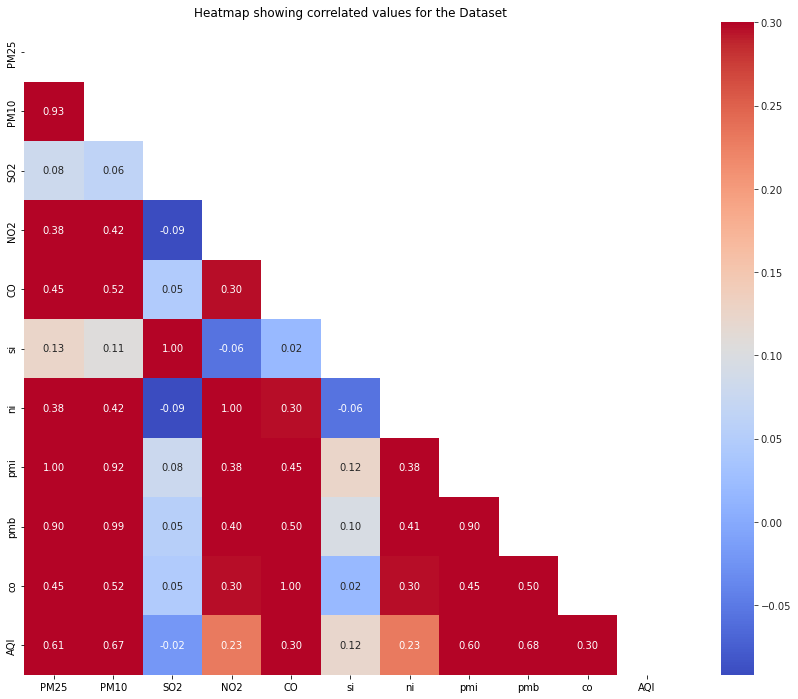

In [41]:
#correlation
df.corr()
plt.figure(figsize=(16,12))
ax=plt.axes()
#sns.heatmap(data=fifa_dataset.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm',ax=ax)
mask = np.zeros_like(df.iloc[:,:].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data=df.iloc[:,:].corr(), mask=mask, vmax=.3, annot=True,fmt='.2f', square=True, cmap='coolwarm')
    
ax.set_title('Heatmap showing correlated values for the Dataset')
plt.show()